In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

Column "measure" describe how strict the measures were. The complete lockdown has the value 3, partly open of schools has the value 2, open of school with measures (early close of shops, social activities,...) has the value of 1.

Distribution of values:

19/11/2020 to 27/04/2021: value 3

28/04/2021 to 04/06/2021: value 2

05/06/2021 to 14/07/2021: value 1

15/07/2021 to 30/08/2021: value 2

01/09/2021 to 15/01/2022: value 1

after 15/01/2022: value 0

In [2]:
Charge_hourly = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')
Charge_hourly['Time'] = pd.to_datetime(Charge_hourly['Time'])
Charge_hourly.set_index('Time', inplace=True)
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
Time,,,,,,,,,
2020-12-02 09:00:00,4.214567,2,10,NaN,False,3.0,NaN,NaN,NaN
2020-12-02 10:00:00,0.560625,2,11,NaN,False,3.0,4.214567,NaN,NaN
2020-12-02 11:00:00,0.000000,2,12,NaN,False,3.0,0.560625,4.214567,NaN
2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567
2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000925
2022-02-28 21:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
2022-02-28 22:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000


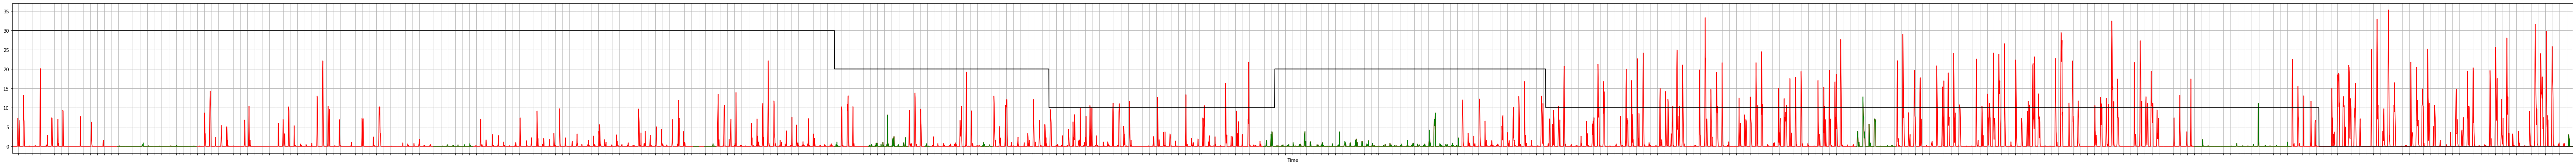

In [3]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = (10*Charge_hourly['measure']).plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [4]:
Charge0422_hourly = pd.read_csv(r'./charge0422_hourly_with_Covid_new.csv')
Charge0422_hourly['Time'] = pd.to_datetime(Charge0422_hourly['Time'])
Charge0422_hourly.set_index('Time', inplace=True)
Charge0422_hourly

,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
Time,,,,,,,,,
2022-03-01 04:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0
2022-03-01 05:00:00,0.000000,1,6,Spring holiday,True,0,0.000000,0.000000,0.0
2022-03-01 06:00:00,0.044108,1,7,Spring holiday,True,0,0.000000,0.000000,0.0
2022-03-01 07:00:00,7.013325,1,8,Spring holiday,True,0,0.044108,0.000000,0.0
2022-03-01 08:00:00,7.089000,1,9,Spring holiday,True,0,7.013325,0.044108,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-28 03:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0
2022-03-28 04:00:00,0.000000,0,6,NaN,False,0,0.000000,0.000000,0.0
2022-03-28 05:00:00,0.000000,0,7,NaN,False,0,0.000000,0.000000,0.0


In [5]:
all_data = pd.concat([Charge_hourly, Charge0422_hourly])

To compare the difference in charging demand during different phases of the pandemic, it is more sensible to use the daily accumulated value due to following reasons:

    HAN is an educational institution, therefore the working time through a week varies based on the number of classes in each day.
    
    However, to compare weekly accumulated demand, weeks that include holidays must be put aside seen they definitely have lower demand. This is a waste of information when HAN dataset only has more than a year of data.
    
The best solution is to compare the accumulated demand between multiple Mondays, Tuesdays and so on.

In [6]:
df = all_data[['Energy_kWh']].groupby(pd.Grouper(freq='1D')).sum()

In [7]:
df

,Energy_kWh
Time,
2020-12-02,4.775750
2020-12-03,26.619800
2020-12-04,37.185858
2020-12-05,0.145475
2020-12-06,0.262417
...,...
2022-03-24,100.891425
2022-03-25,65.569642
2022-03-26,63.078467


In [8]:
df['measure'] = np.NaN
df.loc[df.index < '2021-04-28', 'measure'] = 3
df.loc[(df.index < '2021-06-05') & (df.index > '2021-04-27'),'measure'] = 2
df.loc[(df.index < '2021-07-15') & (df.index > '2021-06-04'),'measure'] = 1
df.loc[(df.index < '2021-09-01') & (df.index > '2021-07-14'),'measure'] = 2
df.loc[(df.index < '2022-01-16') & (df.index > '2021-08-31'),'measure'] = 1
df.loc[(df.index > '2022-01-15'),'measure'] = 0

In [9]:
df

,Energy_kWh,measure
Time,,
2020-12-02,4.775750,3.0
2020-12-03,26.619800,3.0
2020-12-04,37.185858,3.0
2020-12-05,0.145475,3.0
2020-12-06,0.262417,3.0
...,...,...
2022-03-24,100.891425,0.0
2022-03-25,65.569642,0.0
2022-03-26,63.078467,0.0


In [10]:
df['weekday']=df.index.day_of_week

In [11]:
import holidays
df['hols'] = pd.Series(df.index).apply(lambda x: holidays.CountryHoliday('NL').get(x)).values

In [12]:
# Add HAN breaks
# https://www.hanuniversity.com/en/study-and-living/studying-at-han/academic-calendar/#
# https://schoolholidayseurope.eu/school-holidays-holland/
df.loc[(df.index > '2021-02-14 23:00:00') & (df.index < '2021-02-22 00:00:00'), 'hols'] = 'Spring holiday'
df.loc[(df.index > '2021-05-02 23:00:00') & (df.index < '2021-05-10 00:00:00'), 'hols'] = 'May holiday'
df.loc[(df.index > '2021-07-11 23:00:00') & (df.index < '2021-08-16 00:00:00'), 'hols'] = 'Summer break'
df.loc[(df.index > '2021-10-24 23:00:00') & (df.index < '2021-11-01 00:00:00'), 'hols'] = 'Fall holiday'
df.loc[(df.index > '2020-12-20 23:00:00') & (df.index < '2021-01-04 00:00:00'), 'hols'] = 'Winter break'
df.loc[(df.index > '2021-12-23 23:00:00') & (df.index < '2022-01-10 00:00:00'), 'hols'] = 'Winter break'
df.loc[(df.index > '2022-02-27 23:00:00') & (df.index < '2022-03-07 00:00:00'), 'hols'] = 'Spring holiday'

In [13]:
df

,Energy_kWh,measure,weekday,hols
Time,,,,
2020-12-02,4.775750,3.0,2,None
2020-12-03,26.619800,3.0,3,None
2020-12-04,37.185858,3.0,4,None
2020-12-05,0.145475,3.0,5,None
2020-12-06,0.262417,3.0,6,None
...,...,...,...,...
2022-03-24,100.891425,0.0,3,None
2022-03-25,65.569642,0.0,4,None
2022-03-26,63.078467,0.0,5,None


In [14]:
df['is_hol'] = ~df.isna()['hols']
df

,Energy_kWh,measure,weekday,hols,is_hol
Time,,,,,
2020-12-02,4.775750,3.0,2,None,False
2020-12-03,26.619800,3.0,3,None,False
2020-12-04,37.185858,3.0,4,None,False
2020-12-05,0.145475,3.0,5,None,False
2020-12-06,0.262417,3.0,6,None,False
...,...,...,...,...,...
2022-03-24,100.891425,0.0,3,None,False
2022-03-25,65.569642,0.0,4,None,False
2022-03-26,63.078467,0.0,5,None,False


In [15]:
# drop holidays since there would be no one came to school on those days
sample = df.loc[~ df.is_hol]

In [16]:
sample

,Energy_kWh,measure,weekday,hols,is_hol
Time,,,,,
2020-12-02,4.775750,3.0,2,None,False
2020-12-03,26.619800,3.0,3,None,False
2020-12-04,37.185858,3.0,4,None,False
2020-12-05,0.145475,3.0,5,None,False
2020-12-06,0.262417,3.0,6,None,False
...,...,...,...,...,...
2022-03-24,100.891425,0.0,3,None,False
2022-03-25,65.569642,0.0,4,None,False
2022-03-26,63.078467,0.0,5,None,False


In [17]:
NameList = ['Mon0','Mon1','Mon2','Mon3','Tue0','Tue1','Tue2','Tue3','Wed0','Wed1','Wed2','Wed3','Thu0','Thu1','Thu2','Thu3','Fri0','Fri1','Fri2','Fri3']
DataList = []

for i in range(5):
    for j in range(4):
        DataList.append(sample.loc[(sample.measure == j) & (sample.weekday == i)].copy())

In [18]:
for i in range(len(DataList)):
    print('Sample: ', NameList[i])
    print('\tSize: ', len(DataList[i]))
    print('\tMean: ', DataList[i]['Energy_kWh'].mean())
    print('\tStd:  ', DataList[i]['Energy_kWh'].std())

Sample:  Mon0
	Size:  10
	Mean:  49.71639666666666
	Std:   25.775115108315255
Sample:  Mon1
	Size:  21
	Mean:  35.62949523809524
	Std:   22.472764845549957
Sample:  Mon2
	Size:  6
	Mean:  28.94505277777778
	Std:   25.834517929941924
Sample:  Mon3
	Size:  17
	Mean:  8.687941176470588
	Std:   12.388984154219171
Sample:  Tue0
	Size:  9
	Mean:  140.43051296296298
	Std:   43.88881880012505
Sample:  Tue1
	Size:  21
	Mean:  59.24955555555555
	Std:   45.38016998261636
Sample:  Tue2
	Size:  7
	Mean:  22.728836904761902
	Std:   16.683723260824994
Sample:  Tue3
	Size:  17
	Mean:  21.97904754901961
	Std:   18.84299625438707
Sample:  Wed0
	Size:  9
	Mean:  68.93917685185185
	Std:   51.97445581010201
Sample:  Wed1
	Size:  22
	Mean:  41.49863106060606
	Std:   23.99445701537613
Sample:  Wed2
	Size:  7
	Mean:  22.609435714285713
	Std:   13.17684730696452
Sample:  Wed3
	Size:  18
	Mean:  16.677879166666667
	Std:   18.0976728417666
Sample:  Thu0
	Size:  9
	Mean:  106.85367222222222
	Std:   14.87432787809

In [19]:
for i in range(len(DataList)):
    DataList[i].loc[:,'Name'] = NameList[i]

In [20]:
data_with_name = pd.concat(DataList, axis=0)
data_with_name

,Energy_kWh,measure,weekday,hols,is_hol,Name
Time,,,,,,
2022-01-17,49.567833,0.0,0,None,False,Mon0
2022-01-24,48.854417,0.0,0,None,False,Mon0
2022-01-31,59.343767,0.0,0,None,False,Mon0
2022-02-07,6.649133,0.0,0,None,False,Mon0
2022-02-14,52.132300,0.0,0,None,False,Mon0
...,...,...,...,...,...,...
2021-03-19,7.739417,3.0,4,None,False,Fri3
2021-03-26,12.381225,3.0,4,None,False,Fri3
2021-04-09,28.726817,3.0,4,None,False,Fri3


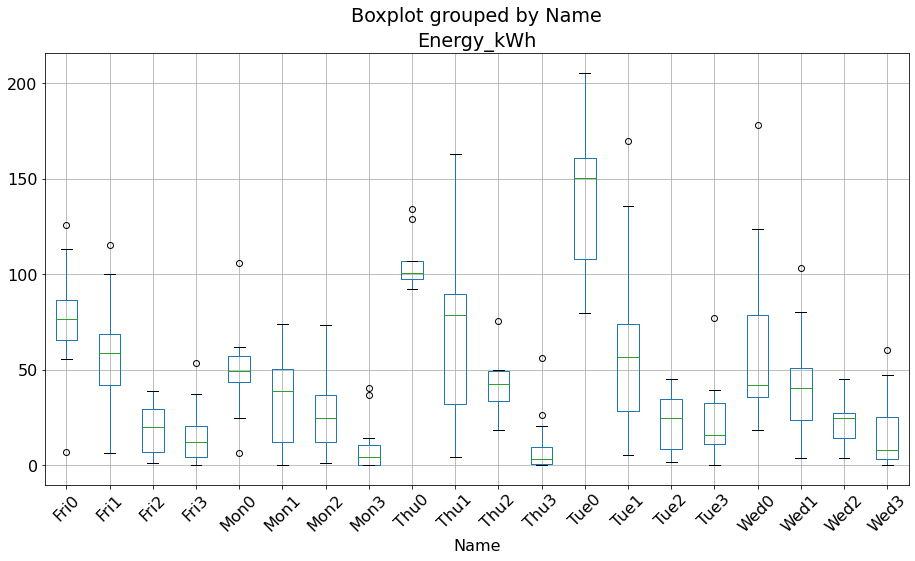

In [21]:
plt.rcParams.update({'font.size': 16})
data_with_name.boxplot(column='Energy_kWh', by='Name', figsize=(15,8))
plt.pyplot.xticks(rotation=45)
plt.pyplot.savefig('subsamples.jpg',bbox_inches="tight")

In [22]:
from scipy.stats import ttest_ind

In [23]:
print('\t', ttest_ind(DataList[8]['Energy_kWh'], DataList[12]['Energy_kWh']))

	 Ttest_indResult(statistic=-2.103984863387681, pvalue=0.051546647127926164)


In [24]:
confidence_level = 0.05
print('Results of t Tests between distributions')
print('Confidence level = ', confidence_level)
print('----------------------------------------------')
for i in range(0,len(DataList),4):
    for k in range(3):
        for l in range(k+1,4):
            print('Null Hypothesis: ', NameList[i+l],' >= ',NameList[i+k],' ; Alternative Hypothesis: ', NameList[i+l],' < ',NameList[i+k],':')
            #print(NameList[i+k],' and ',NameList[i+l],':')
            test_result = ttest_ind(DataList[i+k]['Energy_kWh'], DataList[i+l]['Energy_kWh'], alternative='greater')
            print('\t', test_result)
            if test_result.pvalue <= confidence_level:
                print('\tPASS')
            else:
                print('\tFAIL')

Results of t Tests between distributions
Confidence level =  0.05
----------------------------------------------
Null Hypothesis:  Mon1  >=  Mon0  ; Alternative Hypothesis:  Mon1  <  Mon0 :
	 Ttest_indResult(statistic=1.5570556654547534, pvalue=0.06515228547864636)
	FAIL
Null Hypothesis:  Mon2  >=  Mon0  ; Alternative Hypothesis:  Mon2  <  Mon0 :
	 Ttest_indResult(statistic=1.5592725542087793, pvalue=0.07062293648856952)
	FAIL
Null Hypothesis:  Mon3  >=  Mon0  ; Alternative Hypothesis:  Mon3  <  Mon0 :
	 Ttest_indResult(statistic=5.604736644957679, pvalue=3.932851291259256e-06)
	PASS
Null Hypothesis:  Mon2  >=  Mon1  ; Alternative Hypothesis:  Mon2  <  Mon1 :
	 Ttest_indResult(statistic=0.6228414263769309, pvalue=0.26951467472887924)
	FAIL
Null Hypothesis:  Mon3  >=  Mon1  ; Alternative Hypothesis:  Mon3  <  Mon1 :
	 Ttest_indResult(statistic=4.421661220476013, pvalue=4.3294718964355474e-05)
	PASS
Null Hypothesis:  Mon3  >=  Mon2  ; Alternative Hypothesis:  Mon3  <  Mon2 :
	 Ttest_indR

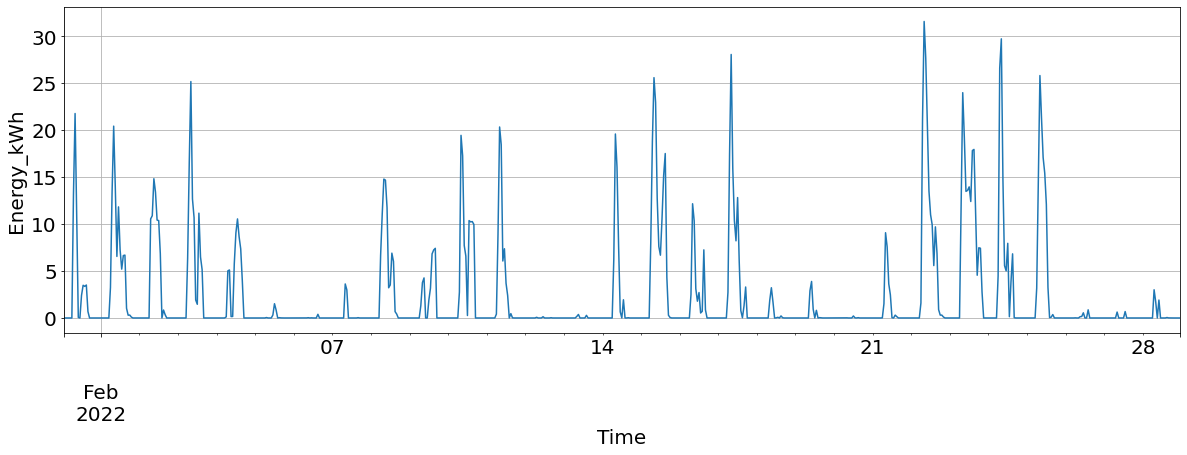

In [25]:
plt.rcParams.update({'font.size': 20})
fig1 = all_data.loc[(all_data.index > '2022-01-31') & (all_data.index < '2022-03-01'),'Energy_kWh'].plot(figsize=(20,6),ylabel='Energy_kWh')
#fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
#plt.pylab.show()
plt.pyplot.gcf()
plt.pyplot.savefig('DemandFeb.png', bbox_inches="tight")

In [26]:
df_Feb_daily = df.loc[(df.index > '2022-01-31') & (df.index < '2022-03-01'),'Energy_kWh'].reset_index()

In [27]:
df_Feb_daily['Time']=pd.to_datetime(df_Feb_daily['Time']).dt.day

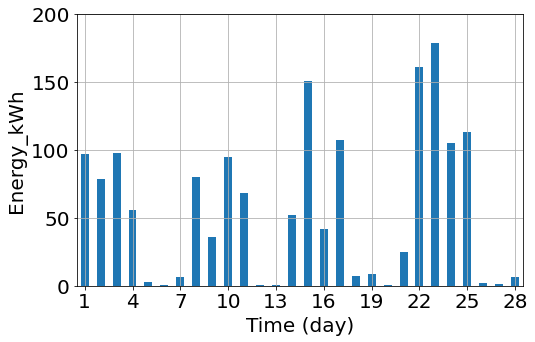

In [28]:
plt.rcParams.update({'font.size': 20})
fig = df_Feb_daily.plot(x='Time',y='Energy_kWh',figsize=(8,5), kind='bar', rot=0, legend=False, ylabel='Energy_kWh', xlabel='Time (day)', ylim=(0,200))
plt.pyplot.locator_params(axis='x', nbins=10)
plt.pyplot.grid()
plt.pyplot.savefig('DemandFeb_daily.png', bbox_inches="tight")

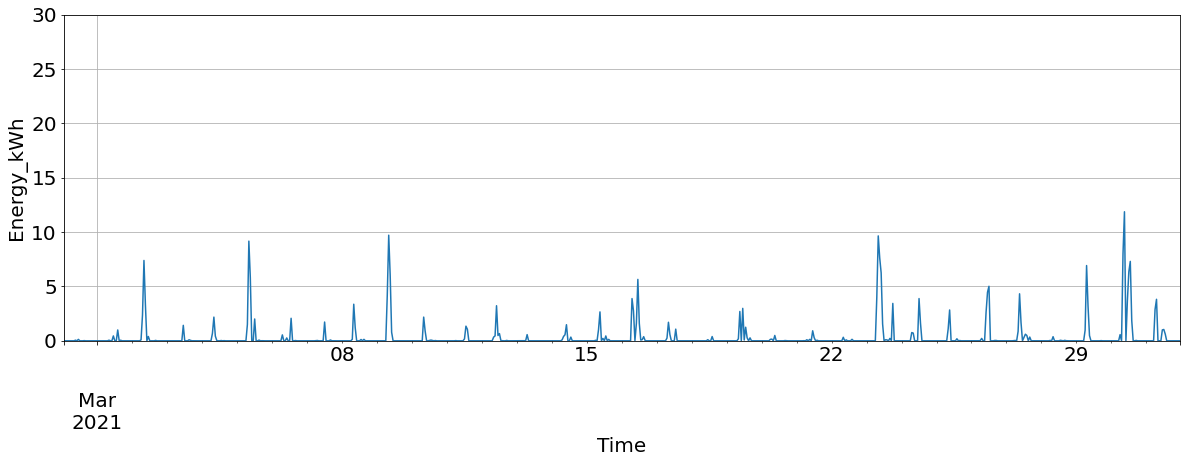

In [29]:
plt.rcParams.update({'font.size': 20})
all_data.loc[(all_data.index > '2021-02-28') & (all_data.index < '2021-04-01'),'Energy_kWh'].plot(figsize=(20,6), ylim=(0,30),ylabel='Energy_kWh')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
#plt.pylab.show()
plt.pyplot.gcf()
plt.pyplot.savefig('DemandMar.png', bbox_inches="tight")

In [30]:
df_Mar_daily = df.loc[(df.index > '2021-02-28') & (df.index < '2021-04-01'),'Energy_kWh'].reset_index()

In [31]:
df_Mar_daily['Time']=pd.to_datetime(df_Mar_daily['Time']).dt.day

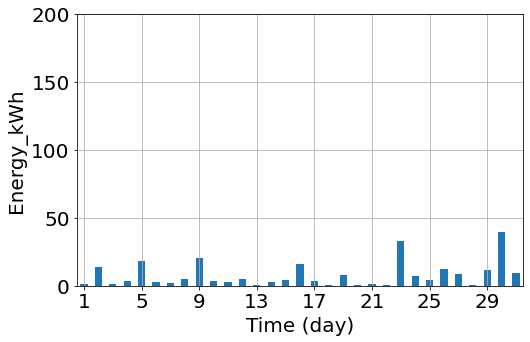

In [32]:
plt.rcParams.update({'font.size': 20})
fig = df_Mar_daily.plot(x='Time',y='Energy_kWh',figsize=(8,5), kind='bar', rot=0, legend=False, ylabel='Energy_kWh', xlabel='Time (day)', ylim=(0,200))
plt.pyplot.locator_params(axis='x', nbins=10)
plt.pyplot.grid()
plt.pyplot.savefig('DemandMar_daily.png', bbox_inches="tight")

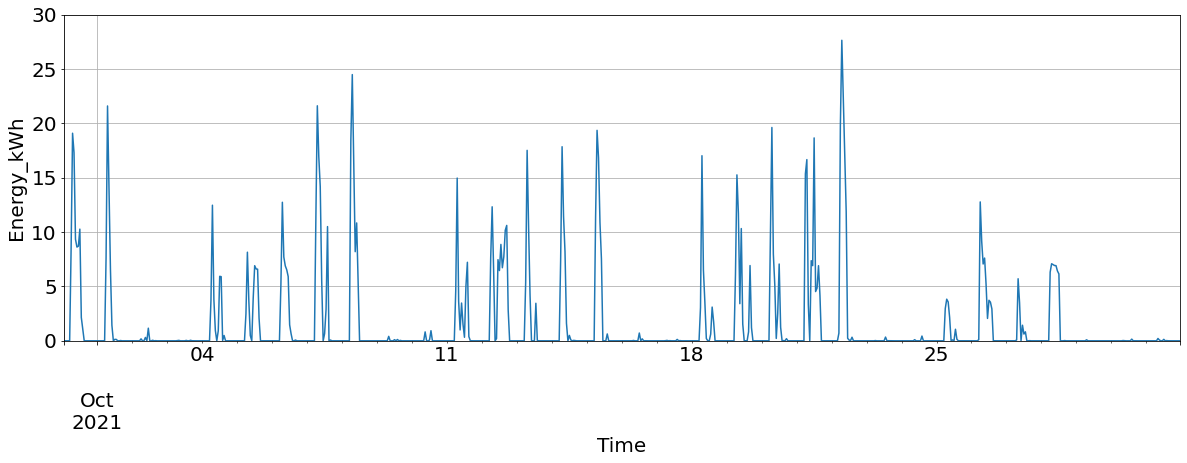

In [33]:
plt.rcParams.update({'font.size': 20})
all_data.loc[(all_data.index > '2021-09-30') & (all_data.index < '2021-11-01'),'Energy_kWh'].plot(figsize=(20,6), ylim=(0,30),ylabel='Energy_kWh')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pyplot.gcf()
plt.pyplot.savefig('DemandOct.png', bbox_inches="tight")

In [34]:
df_Oct_daily = df.loc[(df.index > '2021-09-30') & (df.index < '2021-11-01'),'Energy_kWh'].reset_index()

In [35]:
df_Oct_daily['Time']=pd.to_datetime(df_Oct_daily['Time']).dt.day

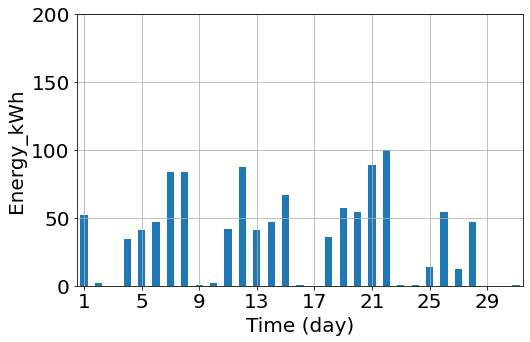

In [36]:
plt.rcParams.update({'font.size': 20})
fig = df_Oct_daily.plot(x='Time',y='Energy_kWh',figsize=(8,5), kind='bar', rot=0, legend=False, ylabel='Energy_kWh', xlabel='Time (day)', ylim=(0,200))
plt.pyplot.locator_params(axis='x', nbins=10)
plt.pyplot.grid()
plt.pyplot.savefig('DemandOct_daily.png', bbox_inches="tight")

In [37]:
df_May_daily = df.loc[(df.index > '2021-04-30') & (df.index < '2021-06-01'),'Energy_kWh'].reset_index()

In [38]:
df_May_daily['Time']=pd.to_datetime(df_May_daily['Time']).dt.day

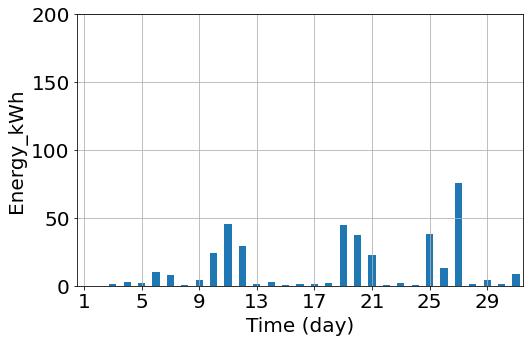

In [39]:
plt.rcParams.update({'font.size': 20})
fig = df_May_daily.plot(x='Time',y='Energy_kWh',figsize=(8,5), kind='bar', rot=0, legend=False, ylabel='Energy_kWh', xlabel='Time (day)', ylim=(0,200))
plt.pyplot.locator_params(axis='x', nbins=10)
plt.pyplot.grid()
plt.pyplot.savefig('DemandMay_daily.png', bbox_inches="tight")

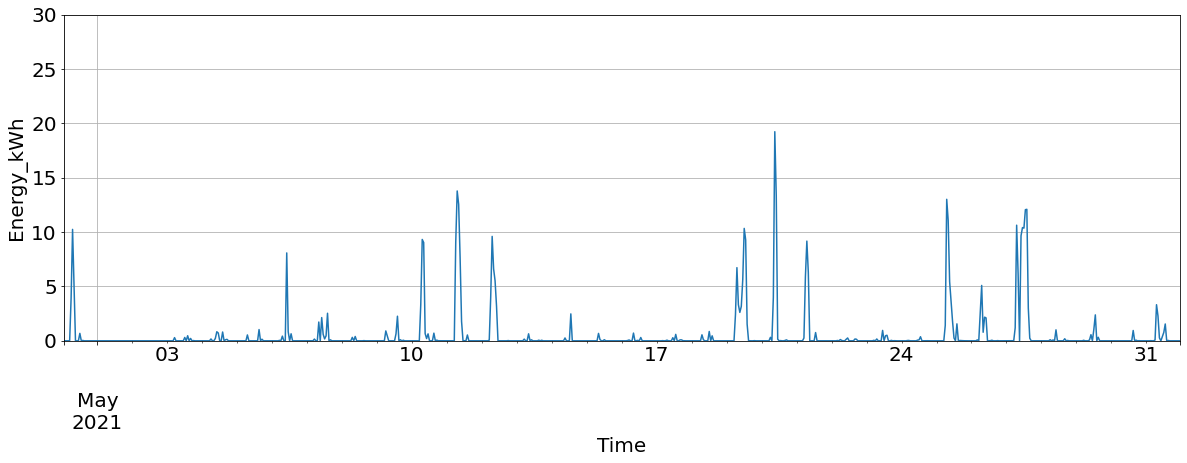

In [40]:
plt.rcParams.update({'font.size': 20})
all_data.loc[(all_data.index > '2021-04-30') & (all_data.index < '2021-06-01'),'Energy_kWh'].plot(figsize=(20,6), ylim=(0,30),ylabel='Energy_kWh')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pyplot.gcf()
plt.pyplot.savefig('DemandMay.png', bbox_inches="tight")